# Predicting vigilance using machine learning
## Optimalisation Random Forest Model 1
Rosalie Lucas (6540384)

This model is used in my thesis predicting drops in vigilance using machine learning.
It is used to optimise the hyperparameters of the Random Forest algorithm of model 1.

In [1]:
# Import Libraries needed
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Installed Graphviz using Pip3

In [2]:
PATH = '/Users/roos/Developer/Bachelor-Thesis'

In [3]:
data_file_path = '/Users/roos/Data/all_trials_noNaN2.csv'
data_file = pd.read_csv(data_file_path)
data = data_file[['9A00000045146841', 'F9000000452CCF41', '76000000452C9741', '7200000045201D41', '4B0000004516B141',
                  'CB000000452D7441', 'DPG_finger-chest', 'DPG_nose-forehead', 'DPG_pinna-mastoid', 'results',
                  'FLIR_forehead', 'FLIR_nose', 'FLIR_DPG_nose-forehead']]
for column in data:  # Describe the amount of different features in each column (column is a feature)
    unique_values = np.unique(data[column])
    number_values = len(unique_values)
    if number_values < 12:
        print("The number of values for feature {} : {} -- {}".format(column, number_values, unique_values))
    else:
        print("The number of values for feature {} : {}".format(column, number_values))

print(data.isnull().sum())

The number of values for feature 9A00000045146841 : 27
The number of values for feature F9000000452CCF41 : 65
The number of values for feature 76000000452C9741 : 38
The number of values for feature 7200000045201D41 : 25
The number of values for feature 4B0000004516B141 : 187
The number of values for feature CB000000452D7441 : 73
The number of values for feature DPG_finger-chest : 366
The number of values for feature DPG_nose-forehead : 235
The number of values for feature DPG_pinna-mastoid : 63
The number of values for feature results : 2 -- [0. 1.]
The number of values for feature FLIR_forehead : 1716
The number of values for feature FLIR_nose : 1716
The number of values for feature FLIR_DPG_nose-forehead : 1716
9A00000045146841          0
F9000000452CCF41          0
76000000452C9741          0
7200000045201D41          0
4B0000004516B141          0
CB000000452D7441          0
DPG_finger-chest          0
DPG_nose-forehead         0
DPG_pinna-mastoid         0
results                  

In [4]:
# Splitting the data
X = data.drop('results', axis=1).values
Y = data['results'].values
print('X shape: {}'.format(np.shape(X)))
print('Y shape: {}'.format(np.shape(Y)))

X_train1, X_test, Y_train1, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train1, Y_train1, train_size=0.7, test_size=0.3, random_state=0)

X shape: (1716, 12)
Y shape: (1716,)


In [5]:
dt = DecisionTreeClassifier(max_depth=3, random_state=30)
dt.fit(X_train, Y_train)
print(Y_train.sum()/len(Y_train))
print(Y_validate.sum()/(len(Y_validate)))


0.771875
0.7985436893203883


In [6]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, Y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_validate, Y_validate))

Training Accuracy is:  0.7854166666666667
Testing Accuracy is:  0.7669902912621359


Number of trees: 100
Number of trees: 150
Number of trees: 200
Number of trees: 250
Number of trees: 300
Number of trees: 350
Number of trees: 400
Number of trees: 450
Number of trees: 500


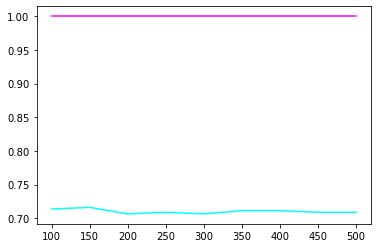

Depth: 1
Depth: 2
Depth: 3
Depth: 4
Depth: 5
Depth: 6
Depth: 7
Depth: 8
Depth: 9
Depth: 10


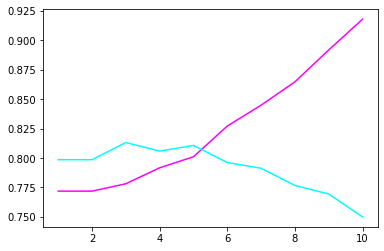

In [7]:
# Trying different trees
test_acc_tree = []
val_acc_tree = []
trees = [100, 150, 200, 250, 300, 350, 400, 450, 500]
for num_trees in range(100, 501, 50):
    print("Number of trees:", num_trees)
    random_forest = RandomForestClassifier(n_estimators=num_trees, random_state=30)
    random_forest.fit(X_train, Y_train)
    test_acc_tree.append(random_forest.score(X_train, Y_train))
    # Accuracy on validation
    val_acc_tree.append(random_forest.score(X_validate, Y_validate))
plt.plot(trees, test_acc_tree, c="magenta")
plt.plot(trees, val_acc_tree, c="aqua")
plt.show()

test_acc_depth = []
val_acc_depth = []
depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for max_depth in range(1, 11, 1):
    print("Depth:", max_depth)
    random_forest = RandomForestClassifier(n_estimators=100, random_state=30, max_depth=max_depth)
    random_forest.fit(X_train, Y_train)
    test_acc_depth.append(random_forest.score(X_train, Y_train))
    val_acc_depth.append( random_forest.score(X_validate, Y_validate))

plt.plot(depth, test_acc_depth, c="magenta")
plt.plot(depth, val_acc_depth, c="aqua")
plt.show()

In [8]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=30, max_depth=5)
random_forest.fit(X_train, Y_train)
print("Training Accuracy is: ", random_forest.score(X_train, Y_train))
# Accuracy on Train
print("Validation Accuracy is: ", random_forest.score(X_validate, Y_validate))
print(Y_test.sum()/(len(Y_test)))
print("Testing Accuracy is: ", random_forest.score(X_test, Y_test))

Training Accuracy is:  0.8010416666666667
Validation Accuracy is:  0.8106796116504854
0.7645348837209303
Testing Accuracy is:  0.7645348837209303


In [9]:
# Building a forest with specific features
random_forest = RandomForestClassifier(n_estimators=100, random_state=30)
random_forest.fit(X_train, Y_train)
# prediction_test = random_forest.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", random_forest.score(X_train, Y_train))
# Accuracy on Train
print("Testing Accuracy is: ", random_forest.score(X_test, Y_test))



Training Accuracy is:  1.0
Testing Accuracy is:  0.7005813953488372
